# Estatística descritiva

Etapas para descrver dados:

1. _Preparação dos dados_: preparar os dados para gerar descrições estatíscamente válidas.

    1. Obtenção dos dados
    2. Análise preliminar dos dados
    3. Limpeza dos dados
    4. Contrução da estrutura de dados

    

2. _Estatística descritiva_: gerar diferentes estatísticas para descrever e resumir os dados de forma consisa e avaliar diferentes maneiras de visualizar esses dados.

## Exemplo: Conjunto de dados 'Adult'

Para exemplificar a utilização da estatística descritiva para compreender conjuntos de dados, consideremos a base de dados demominada "Adult". Trata-se de um _dataset_ público que pode ser encontrado no sítio eletrico  [UCI’s
Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult).

Os dados contém aproximadamente 32 mil observações referentes a vários parâmetros financeiros da população americana: idade, gênero, situação conjugal, país, renda (variável booleana que indica se a pessoa ganha mais de $ 50.000 por ano), nível de educação, ocupação, dentre outras.

- Bibliotecas importadas

In [94]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
plt.style.use('bmh')

- Leitura dos dados

In [3]:
file = open('../data/adult.data', 'r')
def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

In [4]:
data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([
            chr_int(data1[0]), data1[1],
            chr_int(data1[2]), data1[3],
            chr_int(data1[4]), data1[5],
            data1[6], data1[7], data1[8],
            data1[9], chr_int(data1[10]),
            chr_int(data1[11]),
            chr_int(data1[12]),
            data1[13], data1[14]
        ])

In [5]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [6]:
df = pd.DataFrame(data)
df.columns = [
    'age', 'type_employer', 'fnlwgt', 'education', 'education_num', 'marital',
    'ocuppation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loos',
    'hr_per_week', 'country', 'income'
]

In [7]:
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,ocuppation,relationship,race,sex,capital_gain,capital_loos,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [8]:
obs_num, feat_num = df.shape

In [9]:
print(f"Os dados contém exatamente {obs_num} observações referentes a {feat_num} variáveis.")

Os dados contém exatamente 32561 observações referentes a 15 variáveis.


Vamos contar a quantidade de itens por país:

In [10]:
counts_by_country = df['country'].value_counts()
counts_by_country.head()

United-States    29170
Mexico             643
?                  583
Philippines        198
Germany            137
Name: country, dtype: int64

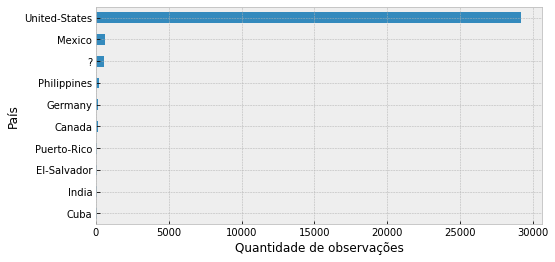

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
counts_by_country[:10].sort_values(ascending=True).plot(kind='barh', ax = ax)
ax.set_xlabel('Quantidade de observações')
ax.set_ylabel('País')
plt.show()

Divisão dos dados por gênero

In [12]:
df1 = df[(df.income == '>50K\n')]

ml, fm = df[(df.sex == 'Male')], df[(df.sex == 'Female')]

ml1 = df[(df.sex == 'Male') & (df.income == '>50K\n')]
fm1 = df[(df.sex == 'Female') & (df.income == '>50K\n')]

In [13]:
print(f"""
    O percentual de pessoas com renda maior do que $50K/ano é {int(len(df1))/float(len(df)) * 100:.2f}%.
    O percentual de homens com renda maior do que $50K/ano é {int(len(ml1))/float(len(ml)) * 100:.2f}%.
    O percentual de mulheres com renda maior do que $50K/ano é {int(len(fm1))/float(len(fm)) * 100:.2f}%.
""")


    O percentual de pessoas com renda maior do que $50K/ano é 24.08%.
    O percentual de homens com renda maior do que $50K/ano é 30.57%.
    O percentual de mulheres com renda maior do que $50K/ano é 10.95%.



In [14]:
print(f"""
    A idade média dos homens é {ml.age.mean():.1f} anos.
    A idade média das mulheres é {fm.age.mean():.1f} anos.
    A idade média dos homens com renda alta é {ml1.age.mean():.1f} anos.
    A idade média das mulheres com renda alta é {fm1.age.mean():.1f} anos.
""")


    A idade média dos homens é 39.4 anos.
    A idade média das mulheres é 36.9 anos.
    A idade média dos homens com renda alta é 44.6 anos.
    A idade média das mulheres com renda alta é 42.1 anos.



As diferennças entre as médias amostrais é uma evidência inicial de que existe diferença de renda entre homens e mulheres. Mais testes estatísticos devem ser realizados para comprovar ou rejeitar essa afirmação inicial.

In [15]:
head = 14 * " " + f"{'Média':>10s} {'Desvio padrão':>15s}"
print("=" * len(head))
print(head)
print("-" * len(head))
for sex in df.sex.unique():
    x1 = df[(df.sex == sex)]
    print(f"{sex:13s} {x1['age'].mean():>10.1f} {x1['age'].std():>15.3f}")
    for income in df.income.unique():
        x2 = df[(df.sex == sex) & (df.income == income)]
        print(f"{sex:6s} {income[:-2]:>6s} {x2['age'].mean():>10.1f} {x2['age'].std():>15.3f}")
print("=" * len(head))

                   Média   Desvio padrão
----------------------------------------
Male                39.4          13.371
Male     <=50       37.1          13.856
Male      >50       44.6          10.485
Female              36.9          14.014
Female   <=50       36.2          14.257
Female    >50       42.1          10.460


Distribuição dos dados

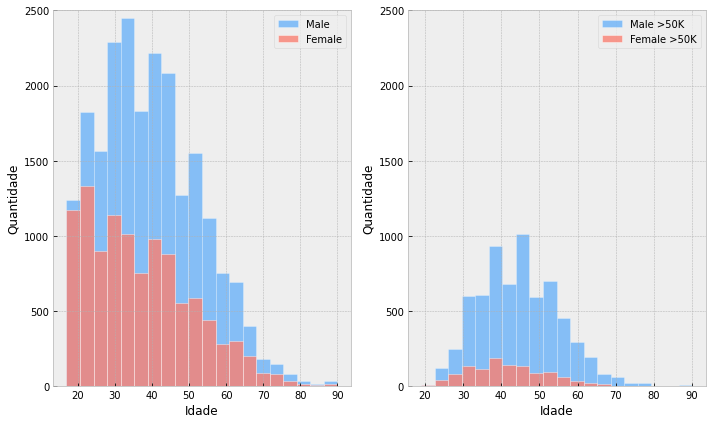

In [55]:

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].hist(ml['age'], bins = 20, color = 'dodgerblue', edgecolor='white', alpha = 0.5, label = 'Male')
ax[0].hist(fm['age'], bins = 20, color='salmon', edgecolor='white', alpha = 0.8, label = 'Female')
ax[0].legend()
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Quantidade')
ax[0].set_ylim((0,2500))

ax[1].hist(ml1['age'], bins = 20, color = 'dodgerblue', edgecolor='white', alpha = 0.5, label = 'Male >50K')
ax[1].hist(fm1['age'], bins = 20, color='salmon', edgecolor='white', alpha = 0.8, label = 'Female >50K')
ax[1].legend()
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Quantidade')
ax[1].set_ylim((0,2500))

plt.tight_layout()
plt.show()

- Tratamento de _outliers_

_Outliers_ são valores que estão distantes de uma medida de tentência central de dos dados. Uma forma bastante utilizada de detectar _outliers_ se dá por uso do Intervalo Interquartil ($IQR$). O $IQR$ é definido como a diferença entre o primeiro e o terceiro quartis, ou seja,

$$IQR = Q_3 - Q_1.$$

Nesse sentido, pode-se declarar uma observação como um _outlier_ se tiver um valor 1,5 vezes maior que o $IQR$ ou 1,5 vezes menor que o $IQR$.

![outliers](https://www.statology.org/wp-content/uploads/2021/01/iqrOutlier1.png)
Fonte: [https://www.statology.org/find-outliers-with-iqr/](https://www.statology.org/find-outliers-with-iqr/)

In [73]:
def remove_outliers(df, label):
    Q1, Q3 = df[label].quantile(.25), df[label].quantile(.75)
    IQR = Q3 - Q1
    return df[(df[label] >= Q1 - 1.5 * IQR) & (df[label] <= Q3 + 1.5 * IQR)]

In [76]:
ml_without_ouliers = remove_outliers(ml, 'age')
ml1_without_ouliers = remove_outliers(ml1, 'age')
fm_without_ouliers = remove_outliers(fm, 'age')
fm1_without_ouliers = remove_outliers(fm1, 'age')

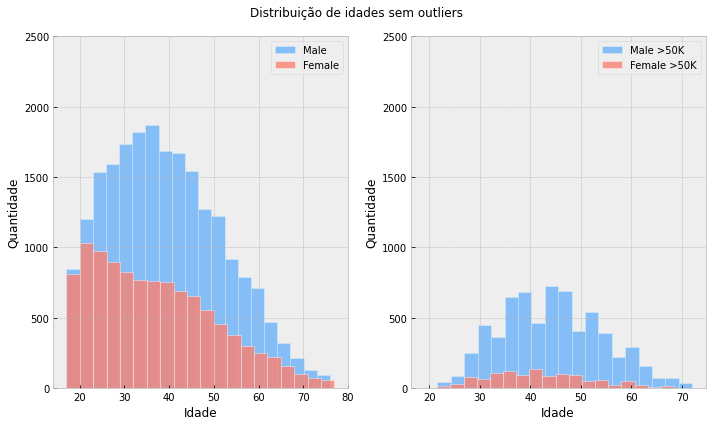

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].hist(ml_without_ouliers['age'], bins = 20, color = 'dodgerblue', edgecolor='white', alpha = 0.5, label = 'Male')
ax[0].hist(fm_without_ouliers['age'], bins = 20, color='salmon', edgecolor='white', alpha = 0.8, label = 'Female')
ax[0].legend()
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Quantidade')
ax[0].set_ylim((0,2500))

ax[1].hist(ml1_without_ouliers['age'], bins = 20, color = 'dodgerblue', edgecolor='white', alpha = 0.5, label = 'Male >50K')
ax[1].hist(fm1_without_ouliers['age'], bins = 20, color='salmon', edgecolor='white', alpha = 0.8, label = 'Female >50K')
ax[1].legend()
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Quantidade')
ax[1].set_ylim((0,2500))

plt.suptitle('Distribuição de idades sem outliers')
plt.tight_layout()
plt.show()

In [84]:
print(f"""
    Diferença média de idades entre homens e mulheres (com outliers): {ml.age.mean() - fm.age.mean():.2f} anos.
    Diferença média de idades entre homens e mulheres (sem outliers): {ml_without_ouliers.age.mean() - fm_without_ouliers.age.mean():.2f} anos.
""")


    Diferença média de idades entre homens e mulheres (com outliers): 2.58 anos.
    Diferença média de idades entre homens e mulheres (sem outliers): 2.52 anos.



A seguir é mostrada a diferença de rendimentos entre homens e mulheres no subconjunto sem _outliers_:

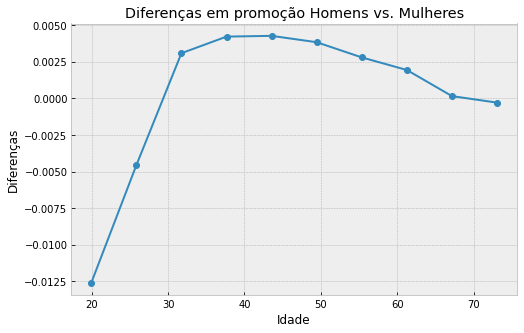

In [93]:
countx, divisionx = np.histogram(ml_without_ouliers['age'], density=True)
county, divisiony = np.histogram(fm_without_ouliers['age'], density=True)
val = [(divisionx[i] + divisionx[i+1])/2 for i in range(len(divisionx) - 1)]

plt.figure(figsize=(8,5))
plt.plot(val, countx - county, 'o-')
plt.xlabel('Idade')
plt.ylabel('Diferenças')
plt.title('Diferenças em promoção Homens vs. Mulheres')
plt.show()

## Medição da assimetria: Assimetria e Coeficiente de Assimetria Mediana de Pearson

_Assimetria_ para dados univariados: $$g_1 = \dfrac{1}{n} \dfrac{\sum_{i}(x_i - \mu^3)}{\sigma^3}$$
onde $\mu$ é a média e $\sigma$ é o desvio padrão.

In [112]:
head = f"{'Sexo':<6s} {'Renda':>6s} {'Assimetria':>10s} {'Tipo':<10s}"
print(len(head) * "=")
print(head)
print(len(head) * "-")
for sex in df.sex.unique():
    x = df[(df.sex == sex)]
    x = remove_outliers(x, 'age')
    skew = stats.skew(x['age'])
    tipo = 'Esquerda' if skew < 0 else ('Direita' if skew > 0 else 'Simétrica')
    print(f"{sex:<13s} {skew:>10.4f} {tipo:<10s}")
    for income in df.income.unique():
        x = df[(df.sex == sex) & (df.income == income)]
        x = remove_outliers(x, 'age')
        skew = stats.skew(x['age'])
        tipo = 'Esquerda' if skew < 0 else ('Direita' if skew > 0 else 'Simétrica')
        print(f"{sex:<6s} {income[:-2]:>6s} {skew:>10.4f} {tipo:<10s}")
print(len(head) * "=")

Sexo    Renda Assimetria Tipo      
-----------------------------------
Male              0.4032 Direita   
Male     <=50     0.6640 Direita   
Male      >50     0.2665 Direita   
Female            0.5916 Direita   
Female   <=50     0.6807 Direita   
Female    >50     0.3755 Direita   
